In [6]:
#from plotting_functions import *
import xarray as xr
import pandas as pd
import numpy as np
import rioxarray as rxr
import geopandas as gpd
from cartopy import crs as ccrs
import warnings
import glob
from matplotlib import pyplot as plt
from statsmodels.graphics.boxplots import violinplot
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

In [3]:
gdf = gpd.read_file('/rds/general/user/tk22/home/paper_2/'+
                    'final_figures/us_eco_l1/NA_CEC_Eco_Level1.shp')
gdf = gdf.to_crs(crs = "EPSG:4326")

mask_h = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_'+
                         'wildfires_theo_keeping/live/ensemble_data/'+
                         'mask_conus_2000_2009.nc').mask.to_numpy()

ds_re = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_'+
                        'wildfires_theo_keeping/live/ensemble_summaries/'+
                         f'p_class_B_19900101_20191231_obs_705.nc')
ds_re = ds_re.rio.write_crs("EPSG:4326")['p'][0,:,:]*0*mask_h

output_eco = dict()
valid_samples = {'Eastern Temperate Forests': ['EASTERN TEMPERATE FORESTS',
                                               'TROPICAL WET FORESTS'],
                 'Great Plains': ['GREAT PLAINS'],
                 'Marine West Coast Forest': ['MARINE WEST COAST FOREST'],
                 'Mediterranean California': ['MEDITERRANEAN CALIFORNIA'],
                 'North American Deserts': ['NORTH AMERICAN DESERTS'],
                 'Northern Forests': ['NORTHERN FORESTS'],
                 'Northwestern Forested Mountains': ['NORTHWESTERN FORESTED MOUNTAINS'],
                 'Taiga': ['TAIGA','HUDSON PLAIN'],
                 'Temperate Sierras': ['SOUTHERN SEMIARID HIGHLANDS',
                                       'TEMPERATE SIERRAS'],
                 'Tundra': ['TUNDRA']}

eco_colour_picker = {'Eastern Temperate Forests': '#b4b867',
                 'Great Plains': '#dfb147',
                 'Marine West Coast Forest': '#215d88',
                 'Mediterranean California': '#f7e090',
                 'North American Deserts': '#be8039',
                 'Northern Forests': '#73a57e',
                 'Northwestern Forested Mountains': '#306f48',
                 'Taiga': '#91c0a8',
                 'Temperate Sierras': '#e6c84a',
                 'Tundra': '#bad7d5'}

eco_plot_order = ['Marine West Coast Forest', 'Mediterranean California',
              'Northwestern Forested Mountains', 'North American Deserts', 
              'Temperate Sierras', 'Great Plains', 'Northern Forests',
              'Eastern Temperate Forests']

for key in valid_samples.keys():
    print(key)
    sample_gdf = gdf[[x in valid_samples[key] for x in gdf.NA_L1NAME ]]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        try:
            sample_ds_re   = ds_re.rio.clip(sample_gdf.geometry.values, sample_gdf.crs)
            output_eco[key] = sample_ds_re
        except:
            pass

Eastern Temperate Forests
Great Plains
Marine West Coast Forest
Mediterranean California
North American Deserts
Northern Forests
Northwestern Forested Mountains
Taiga
Temperate Sierras
Tundra


In [4]:
gdf = gpd.read_file('/rds/general/user/tk22/home/paper_2/'+
                    'final_figures/us_census/tl_2012_us_state.shp')
gdf = gdf.to_crs(crs = "EPSG:4326")

mask_h = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_'+
                         'wildfires_theo_keeping/live/ensemble_data/'+
                         'mask_conus_2000_2009.nc').mask.to_numpy()

ds_re = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_'+
                        'wildfires_theo_keeping/live/ensemble_summaries/'+
                         f'p_class_B_19900101_20191231_obs_705.nc')
ds_re = ds_re.rio.write_crs("EPSG:4326")['p'][0,:,:]*0*mask_h

output_state = dict()
valid_samples = {'Pacific West': ['WA','OR','CA'],
                 'Mountain West': ['MT','ID','WY','NV','UT','CO','AZ','NM'],
                 'West North Central': ['ND','SD','MN','NE','IA','KS','MO'],
                 'East North Central': ['WI','MI','IL','IN','OH'],
                 'Middle Atlantic': ['NY','PA','NJ'],
                 'New England': ['VT','NH','ME','MA','CT','RI'],
                 'West South Central': ['TX','OK','AR','LA'],
                 'East South Central': ['KY','TN','MS','AL'],
                 'South Atlantic': ['WV','MD','DE','DC','VA','NC','SC','GA','FL']}

state_colour_picker = {'Pacific West': 'tomato',
                       'Mountain West': 'indianred',
                       'West North Central': 'cornflowerblue',
                       'East North Central': 'steelblue',
                       'Middle Atlantic': 'limegreen',
                       'New England': 'forestgreen',
                       'West South Central': 'darkorange', 
                       'East South Central': 'bisque',
                       'South Atlantic': 'burlywood'}

state_plot_order = ['Pacific West', 'Mountain West', 'West North Central',
              'East North Central', 'Middle Atlantic', 'New England',
              'West South Central', 'East South Central', 'South Atlantic']

for key in valid_samples.keys():
    print(key)
    sample_gdf = gdf[[x in valid_samples[key] for x in gdf.STUSPS ]]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        try:
            sample_ds_re   = ds_re.rio.clip(sample_gdf.geometry.values, sample_gdf.crs)
            output_state[key] = sample_ds_re
        except:
            pass

Pacific West
Mountain West
West North Central
East North Central
Middle Atlantic
New England
West South Central
East South Central
South Atlantic


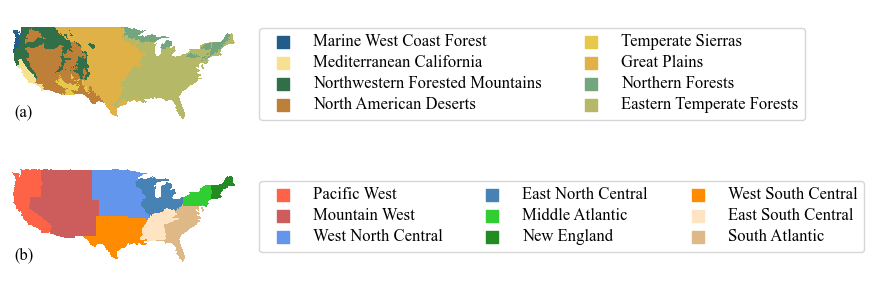

In [7]:
tnr = FontProperties(fname = '/rds/general/user/tk22/home/fonts/times.ttf',
                     size = 12)

fig = plt.figure(layout = "constrained", figsize = (9,3))
gs = mpl.gridspec.GridSpec(2, 3, figure = fig)

ax1 = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())
ax1.grid(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.set_xlim(-125, -67)
ax1.set_ylim(24, 50)
for i,key in enumerate(output_eco.keys()):
    ecoregion = output_eco[key]
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'ecomap',[eco_colour_picker[key],eco_colour_picker[key]],N=2)
    ax1.pcolormesh(ecoregion.longitude.data, ecoregion.latitude.data,
                   ecoregion, cmap = cmap, transform = ccrs.PlateCarree())
ax1.axis('off')
ax1.text(-124, 25, f'(a)', color = 'k',
         font = tnr, ha = 'left', va = 'bottom',
         bbox = dict(facecolor = 'white',
                     edgecolor = 'white',
                     pad = 0))

ax1_leg = fig.add_subplot(gs[0,1:])
for k in eco_plot_order:
    color = eco_colour_picker[k]
    ax1_leg.scatter([1e4], [1e4], marker = 's', color = color, label = k)
ax1_leg.set_ylim((0,1))
ax1_leg.set_xlim((0,1))
ax1_leg.legend(loc = 'center left', prop = tnr, labelspacing = 0.3, markerscale = 1.4, ncol = 2)
ax1_leg.grid(False)
ax1_leg.spines['top'].set_visible(False)
ax1_leg.spines['right'].set_visible(False)
ax1_leg.spines['bottom'].set_visible(False)
ax1_leg.spines['left'].set_visible(False)
ax1_leg.xaxis.set_visible(False)
ax1_leg.yaxis.set_visible(False)


ax2 = fig.add_subplot(gs[1,0], projection = ccrs.PlateCarree())
ax2.grid(False)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_xlim(-125, -67)
ax2.set_ylim(24, 50)
for i,key in enumerate(output_state.keys()):
    state = output_state[key]
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'ecomap',[state_colour_picker[key],state_colour_picker[key]],N=2)
    ax2.pcolormesh(state.longitude.data, state.latitude.data,
                   state, cmap = cmap, transform = ccrs.PlateCarree())
ax2.axis('off')
ax2.text(-124, 25, f'(b)', color = 'k',
         font = tnr, ha = 'left', va = 'bottom',
         bbox = dict(facecolor = 'white',
                     edgecolor = 'white',
                     pad = 0))

ax2_leg = fig.add_subplot(gs[1,1:])
for k in state_plot_order:
    color = state_colour_picker[k]
    ax2_leg.scatter([1e4], [1e4], marker = 's', color = color, label = k)
ax2_leg.set_ylim((0,1))
ax2_leg.set_xlim((0,1))
ax2_leg.legend(loc = 'center left', prop = tnr, labelspacing = 0.3, markerscale = 1.4, ncol = 3)
ax2_leg.grid(False)
ax2_leg.spines['top'].set_visible(False)
ax2_leg.spines['right'].set_visible(False)
ax2_leg.spines['bottom'].set_visible(False)
ax2_leg.spines['left'].set_visible(False)
ax2_leg.xaxis.set_visible(False)
ax2_leg.yaxis.set_visible(False)

plt.tight_layout()
plt.savefig(('/rds/general/user/tk22/home/paper_2/'+
             'final_figures/figures/supplementary_figure_1.jpg'), 
            bbox_inches = 'tight', facecolor = 'white', dpi = 300)
plt.show()